In [1]:
from IPython.display import Image

# 문제 설명

* ROR 게임은 두 팀으로 나누어서 진행하며, 상대 팀 진영을 먼저 파괴하면 이기는 게임입니다. 따라서, 각 팀은 상대 팀 진영에 최대한 빨리 도착하는 것이 유리합니다.

* 지금부터 당신은 한 팀의 팀원이 되어 게임을 진행하려고 합니다. 다음은 5 x 5 크기의 맵에, 당신의 캐릭터가 (행: 1, 열: 1) 위치에 있고, 상대 팀 진영은 (행: 5, 열: 5) 위치에 있는 경우의 예시입니다.

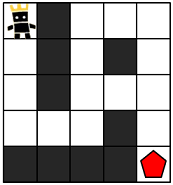

In [5]:
Image('../../../../image/최단거리1.png')

* 위 그림에서 검은색 부분은 벽으로 막혀있어 갈 수 없는 길이며, 흰색 부분은 갈 수 있는 길입니다. 캐릭터가 움직일 때는 동, 서, 남, 북 방향으로 한 칸씩 이동하며, 게임 맵을 벗어난 길은 갈 수 없습니다. 아래 예시는 캐릭터가 상대 팀 진영으로 가는 두 가지 방법을 나타내고 있습니다.

* 첫 번째 방법은 11개의 칸을 지나서 상대 팀 진영에 도착했습니다.

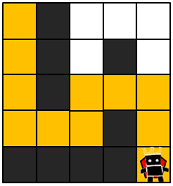

In [6]:
Image('../../../../image/최단거리2.png')

* 두 번째 방법은 15개의 칸을 지나서 상대팀 진영에 도착했습니다.

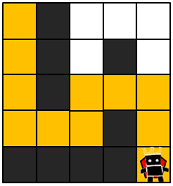

In [4]:
Image('../../../../image/최단거리3.png')

* 위 예시에서는 첫 번째 방법보다 더 빠르게 상대팀 진영에 도착하는 방법은 없으므로, 이 방법이 상대 팀 진영으로 가는 가장 빠른 방법입니다.

* 만약, 상대 팀이 자신의 팀 진영 주위에 벽을 세워두었다면 상대 팀 진영에 도착하지 못할 수도 있습니다. 예를 들어, 다음과 같은 경우에 당신의 캐릭터는 상대 팀 진영에 도착할 수 없습니다.

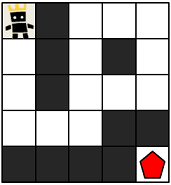

In [7]:
Image('../../../../image/최단거리4.png')

* 게임 맵의 상태 maps가 매개변수로 주어질 때, 캐릭터가 상대 팀 진영에 도착하기 위해서 지나가야 하는 칸의 개수의 최솟값을 return 하도록 solution 함수를 완성해주세요. 단, 상대 팀 진영에 도착할 수 없을 때는 -1을 return 해주세요.

# 제한사항

* maps는 n x m 크기의 게임 맵의 상태가 들어있는 2차원 배열로, n과 m은 각각 1 이상 100 이하의 자연수입니다.
    * n과 m은 서로 같을 수도, 다를 수도 있지만, n과 m이 모두 1인 경우는 입력으로 주어지지 않습니다.
* maps는 0과 1로만 이루어져 있으며, 0은 벽이 있는 자리, 1은 벽이 없는 자리를 나타냅니다.
* 처음에 캐릭터는 게임 맵의 좌측 상단인 (1, 1) 위치에 있으며, 상대방 진영은 게임 맵의 우측 하단인 (n, m) 위치에 있습니다.

# 예제 입출력

|maps|answer|
|---|---|
|[[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]]|11|
|[[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,0],[0,0,0,0,1]]|-1|

In [9]:
from collections import deque

def solution(maps):
    w, h = len(maps[0]), len(maps)
    def bfs(x, y):
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]

        temp_loc = deque()
        temp_loc.append((y, x))

        while temp_loc:
            y, x = temp_loc.popleft()
            for i in range(4):
                nx = x + dx[i]
                ny = y + dy[i]

                if (nx < 0) or (nx >= w) or (ny < 0) or (ny >= h):
                    continue

                if maps[ny][nx] == 0:
                    continue

                if maps[ny][nx] == 1:
                    maps[ny][nx] = maps[y][x] + 1
                    temp_loc.append((ny, nx))

        return maps[h-1][w-1]    
    answer = bfs(0, 0)
    if answer == 1:
        return -1
    return answer


In [10]:
for map in [[[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]], [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,0],[0,0,0,0,1]]]:
    print(solution(map))

11
-1


# 풀이 과정 및 주의사항

 * 재귀함수를 bfs를 사용해서 상, 하, 좌, 우를 탐색 후 해당 값이 1인 위치(갈 수 있는 위치)이면 해당 좌표값을 저장 후 현재 위치 값에 1을 더한 값으로 바꿔주는 과정을 연속적으로 거친다.(더 이상 해당되는 좌표가 없을때 까지)
 * List 좌표는 List\[세로\]\[가로\]이므로 List\[y\]\[n\]의 형식으로 사용한다.
 * 더 이상 해당되는 좌표가 없을때 까지 1을 연속적으로 더해주는 과정을 거친 후, 오른쪽 하단 마지막 좌표 값이 1이면 (도달 하지 못했으므로) -1를 반환하고, 1이 아니면 해당 좌표의 값을 반환한다.

https://school.programmers.co.kr/learn/courses/30/lessons/1844